In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awaiskaggler/insurance-csv")

print("Path to dataset files:", path)

100%|██████████| 13.4k/13.4k [00:00<00:00, 17.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1


In [ ]:
ls /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1


insurance.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
smoker = df['smoker']


0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object


In [ ]:
yes_count = smoker[smoker == 'yes'].count()
no_count = smoker[smoker == 'no'].count()

print("Number of 'yes' in smoker:", yes_count)
print("Number of 'no' in smoker:", no_count)


Number of 'yes' in smoker: 274
Number of 'no' in smoker: 1064


In [ ]:
probability_yes = yes_count / (yes_count + no_count)
print("Probability of 'yes' in smoker:", probability_yes)


Probability of 'yes' in smoker: 0.20478325859491778


In [ ]:
from scipy.stats import binom

n = 10
p = 0.20478325859491778
k = 4

cumulative_prob = binom.cdf(k - 1, n, p)
from scipy.stats import binom

n = 10
p = 0.20
k = 4

cumulative_prob = binom.cdf(k - 1, n, p)

prob_at_least_4 = 1 - cumulative_prob
print(f"Probability of at least 4 smokers in a sample of 10: {prob_at_least_4:.4f}")

Probability of at least 4 smokers in a sample of 10: 0.1209


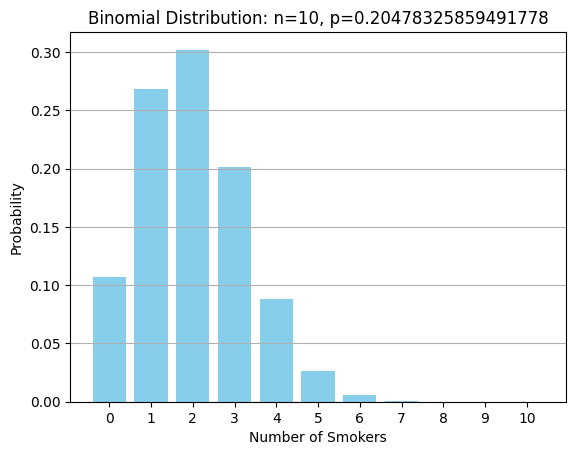

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of smokers (0 to 10)
x = np.arange(0, n + 1)
# Binomial PMF
pmf = binom.pmf(x, n, p)

plt.bar(x, pmf, color='skyblue')
plt.xlabel('Number of Smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution: n=10, p=0.20478325859491778')
plt.xticks(x)
plt.grid(axis='y')
plt.show()

In [ ]:
expenses = df['expenses']
expenses

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [ ]:
probability_expenses_more_than_20000 = (expenses > 20000).mean()

print(f"Probability of expenses being more than 20000: {probability_expenses_more_than_20000}")


Probability of expenses being more than 20000: 0.2040358744394619


In [ ]:
n = 15
p = 0.2040358744394619
k = 5

prob_exactly_5 = binom.pmf(k, n, p)
print(f"Probability of exactly 5 individuals with charges above $20,000: {prob_exactly_5:.4f}")

Probability of exactly 5 individuals with charges above $20,000: 0.1084


In [ ]:
k = 5

cumulative_prob_at_most_5 = binom.cdf(k, n, p)
print(f"Cumulative probability of at most 5 individuals with charges above $20,000: {cumulative_prob_at_most_5:.4f}")

Cumulative probability of at most 5 individuals with charges above $20,000: 0.9336


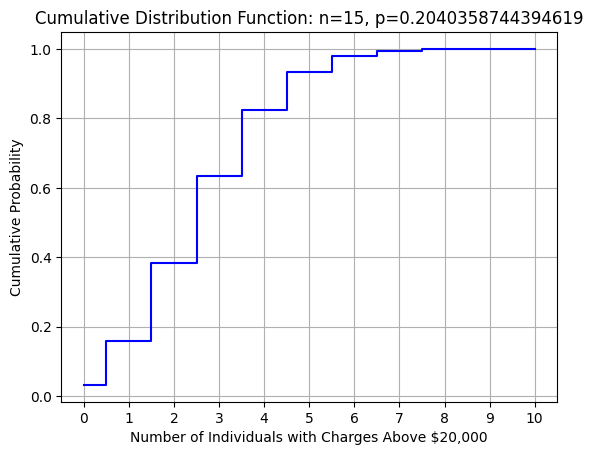

In [ ]:
# Binomial CDF
cdf = binom.cdf(x, n, p)

plt.step(x, cdf, where='mid', color='blue')
plt.xlabel('Number of Individuals with Charges Above $20,000')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function: n=15, p=0.2040358744394619')
plt.xticks(x)
plt.grid()
plt.show()

In [ ]:
region = df['region']
region

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
southwest_count = region[region == 'southwest'].count()
southeast_count = region[region == 'southeast'].count()
northwest_count = region[region == 'northwest'].count()
northeast_count = region[region == 'northeast'].count()

total_count = len(region)

southwest_probability = southwest_count / total_count
southeast_probability = southeast_count / total_count
northwest_probability = northwest_count / total_count
northeast_probability = northeast_count / total_count

print(f"Probability of Southwest: {southwest_probability:.4f}")
print(f"Probability of Southeast: {southeast_probability:.4f}")
print(f"Probability of Northwest: {northwest_probability:.4f}")
print(f"Probability of Northeast: {northeast_probability:.4f}")


Probability of Southwest: 0.2429
Probability of Southeast: 0.2720
Probability of Northwest: 0.2429
Probability of Northeast: 0.2422


In [ ]:
import numpy as np

n = 50
num_samples = 1000

# Simulate for each region
np.random.seed(42)  # For reproducibility
smokers_SW = np.random.binomial(n, 0.2429, num_samples)
smokers_SE = np.random.binomial(n, 0.2720, num_samples)
smokers_NW = np.random.binomial(n, 0.2429, num_samples)
smokers_NE = np.random.binomial(n, 0.2422, num_samples)

<ipython-input-28-499ea20ffbd9>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=regions)


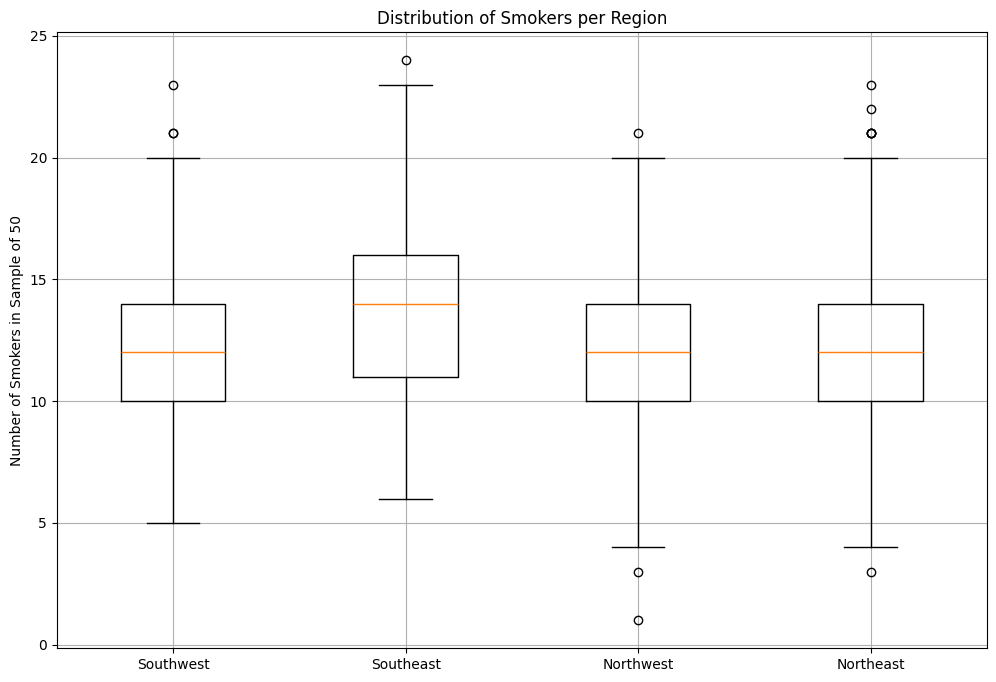

In [ ]:
import matplotlib.pyplot as plt

regions = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
data = [smokers_SW, smokers_SE, smokers_NW, smokers_NE]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=regions)
plt.ylabel('Number of Smokers in Sample of 50')
plt.title('Distribution of Smokers per Region')
plt.grid()
plt.show()

In [ ]:
expected_values = {
    'Southwest': n * 0.2429,
    'Southeast': n * 0.2720,
    'Northwest': n * 0.2429,
    'Northeast': n * 0.2422
}

simulated_means = {
    'Southwest': np.mean(smokers_SW),
    'Southeast': np.mean(smokers_SE),
    'Northwest': np.mean(smokers_NW),
    'Northeast': np.mean(smokers_NE)
}

print("Expected vs Simulated Mean Number of Smokers in a Sample of 50:")
for region in regions:
    print(f"{region}: Expected = {expected_values[region]:.2f}, Simulated Mean = {simulated_means[region]:.2f}")

Expected vs Simulated Mean Number of Smokers in a Sample of 50:
Southwest: Expected = 12.14, Simulated Mean = 12.04
Southeast: Expected = 13.60, Simulated Mean = 13.67
Northwest: Expected = 12.14, Simulated Mean = 12.15
Northeast: Expected = 12.11, Simulated Mean = 12.01


In [ ]:
# Calculate the 90th percentile of charges
threshold_charge = df['expenses'].quantile(0.90)
print(f"High-risk threshold charge: ${threshold_charge:.2f}")

High-risk threshold charge: $34831.72


In [ ]:
from scipy.stats import binom

n = 30
p = 0.10
k = 8

prob_8_high_risk = binom.pmf(k, n, p)
print(f"Probability of selecting exactly 8 high-risk individuals: {prob_8_high_risk:.6f}")

Probability of selecting exactly 8 high-risk individuals: 0.005764


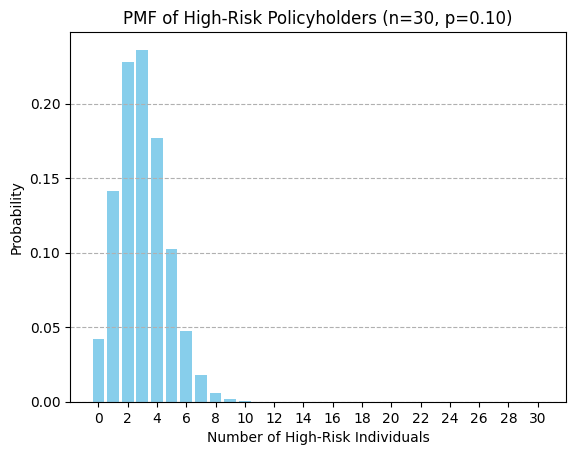

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, n + 1)
probs = binom.pmf(x, n, p)

plt.bar(x, probs, color='skyblue')
plt.xlabel('Number of High-Risk Individuals')
plt.ylabel('Probability')
plt.title('PMF of High-Risk Policyholders (n=30, p=0.10)')
plt.xticks(range(0, n+1, 2))
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
n = 12
p = 0.40
k = 4


prob_at_most_4 = binom.cdf(k, n, p)


prob_at_least_5 = 1 - prob_at_most_4
print(f"Probability of at least 5 individuals having more than 3 children: {prob_at_least_5:.6f}")

Probability of at least 5 individuals having more than 3 children: 0.561822


In [ ]:
prob_manual = sum(binom.pmf(k, n, p) for k in range(5, 13))
print(f"Manual calculation of probability: {prob_manual:.6f}")

Manual calculation of probability: 0.561822


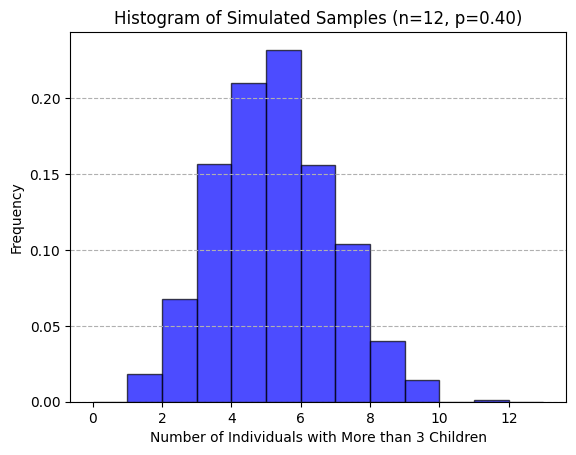

In [ ]:
np.random.seed(42)
samples = binom.rvs(n, p, size=1000)

# Histogram visualization
plt.hist(samples, bins=range(n+2), alpha=0.7, color='blue', edgecolor='black', density=True)
plt.xlabel('Number of Individuals with More than 3 Children')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Samples (n=12, p=0.40)')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
simulated_mean = np.mean(samples)
simulated_variance = np.var(samples)

expected_mean = n * p
expected_variance = n * p * (1 - p)

print(f"Expected Mean: {expected_mean:.2f}, Simulated Mean: {simulated_mean:.2f}")
print(f"Expected Variance: {expected_variance:.2f}, Simulated Variance: {simulated_variance:.2f}")

Expected Mean: 4.80, Simulated Mean: 4.75
Expected Variance: 2.88, Simulated Variance: 2.87
